In [5]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One hot encoding the target variable
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Splitting the training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

100%|██████████| 74/74 [00:00<00:00, 1091.28it/s]


/Users/andreoliveira/Documents/GitHub/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 612ms/step - accuracy: 0.2109 - loss: 1.8607 - val_accuracy: 0.3051 - val_loss: 1.6619
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 551ms/step - accuracy: 0.3414 - loss: 1.5414 - val_accuracy: 0.3757 - val_loss: 1.4410
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 545ms/step - accuracy: 0.4163 - loss: 1.3623 - val_accuracy: 0.4237 - val_loss: 1.3850
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 539ms/step - accuracy: 0.4551 - loss: 1.3369 - val_accuracy: 0.5226 - val_loss: 1.2892
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 553ms/step - accuracy: 0.5194 - loss: 1.2575 - val_accuracy: 0.5113 - val_loss: 1.2732
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 601ms/step - accuracy: 0.5848 - loss: 1.1209 - val_accuracy: 0.5169 - val_loss: 1.2411
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 551ms/step - accuracy: 0.5344 - loss: 1.1751 - val_accuracy: 0.5113 - val_loss: 1.3136
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 551ms/step - accuracy: 0.5859 - loss: 1.0346 - val_accu

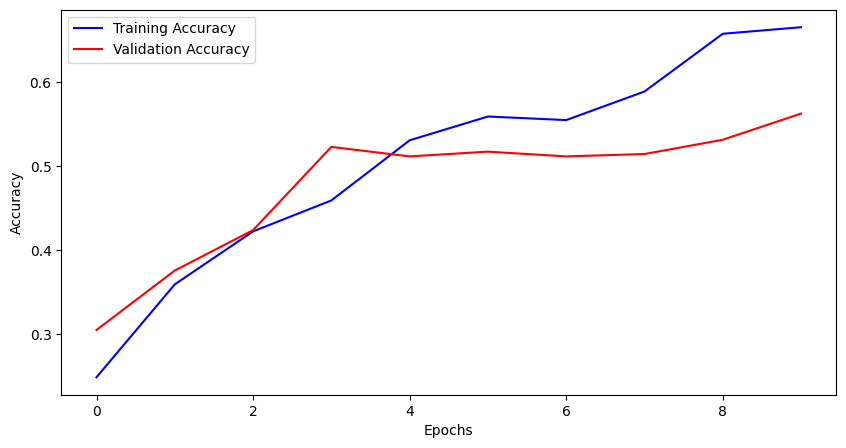

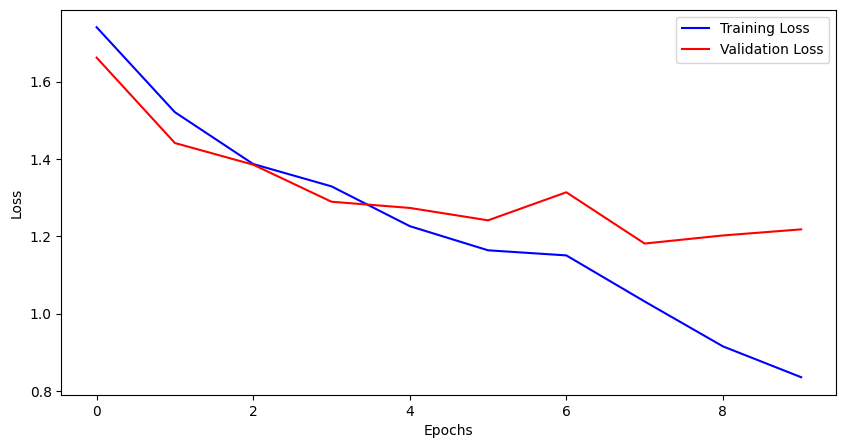

In [ ]:
#Building the CNN model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('cnn_model.h5')

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating the model

In [8]:
# Loading the model
from keras.models import load_model
model = load_model('cnn_model.h5')

# Evaluating the model
predictions = model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.7042 - loss: 0.8837
Test Loss: 1.1486629247665405
Test Accuracy: 0.5986078977584839


F1 Score:  0.5848712002802271
Precision:  0.6089018895617545
Recall:  0.5986078886310905
Accuracy:  0.5986078886310905


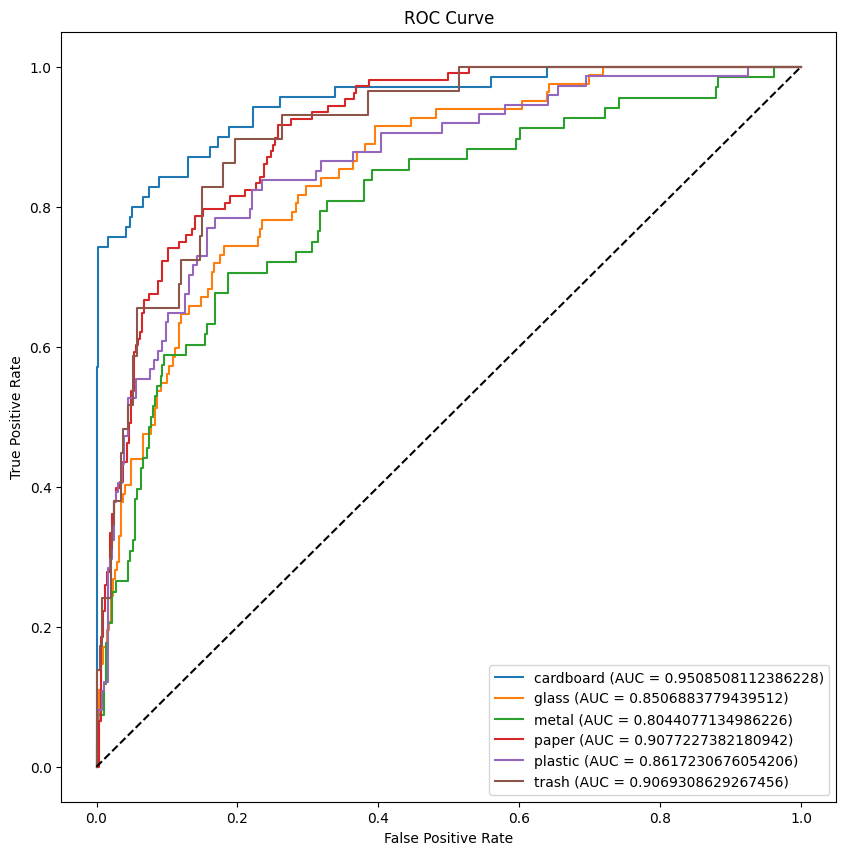

              precision    recall  f1-score   support

   cardboard       0.88      0.76      0.82        70
       glass       0.56      0.43      0.48        82
       metal       0.54      0.40      0.46        68
       paper       0.53      0.87      0.66       108
     plastic       0.63      0.58      0.61        74
       trash       0.50      0.21      0.29        29

    accuracy                           0.60       431
   macro avg       0.61      0.54      0.55       431
weighted avg       0.61      0.60      0.58       431



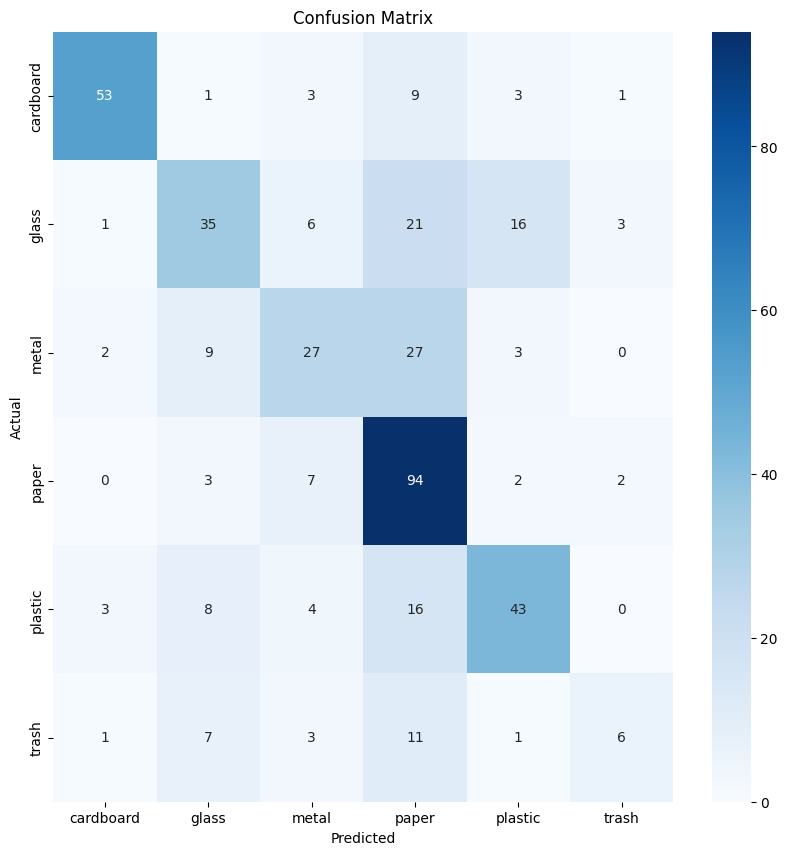

In [9]:
# Model Evaluation

# f1 score, precision, recall, accuracy, confusion matrix, classification report, and ROC curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# F1 Score
f1 = f1_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score: ", f1)

# Precision
precision = precision_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Precision: ", precision)

# Recall
recall = recall_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Recall: ", recall)

# Accuracy
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))
print("Accuracy: ", accuracy)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 10))

for i in range(6):
    plt.plot(fpr[i], tpr[i], label=classes_names[i] + ' (AUC = ' + str(roc_auc[i]) + ')')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

# Classification Report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), target_names=classes_names))

# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


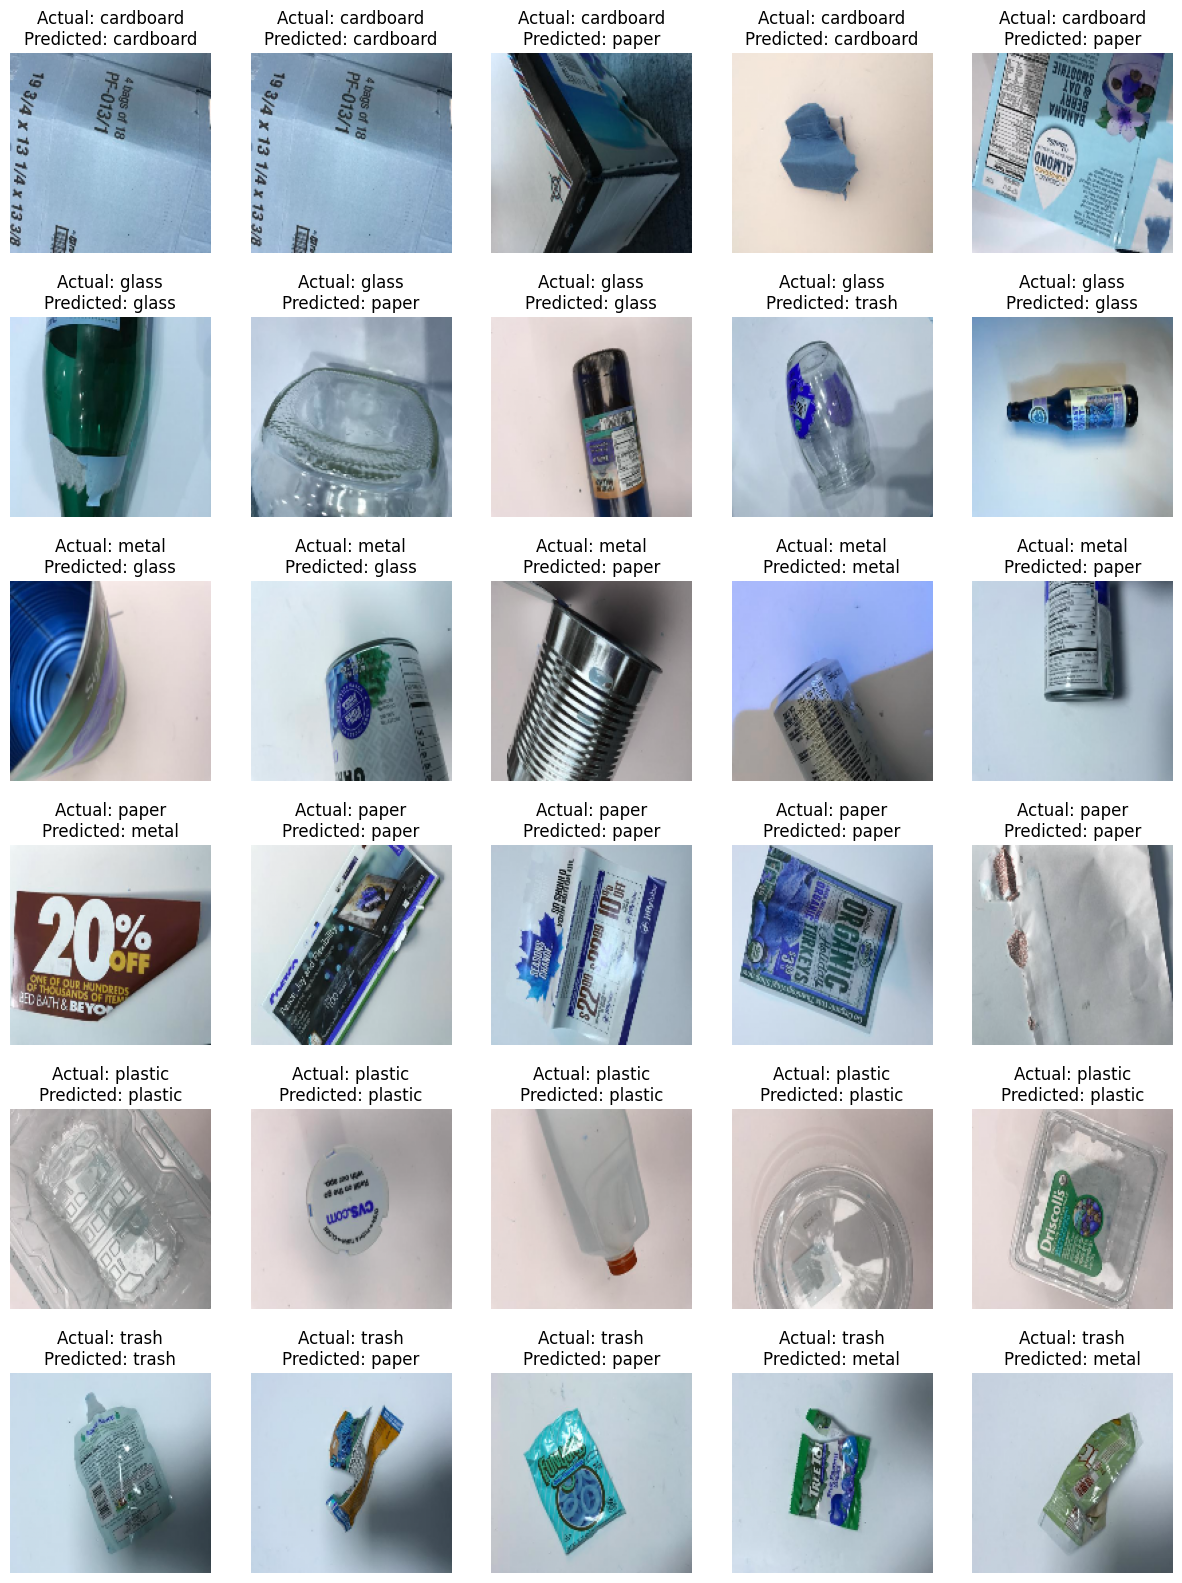

In [10]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)